## Linear Regression

The Dataset used for this assignment is the Salary data - Simple linear regression dataset from Kaggle (https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression). This Data set contains the information related to the salary of the employees based on years of experience.<br>

Missing values: NA<br>
Number of Attributes: 2<br>
Attribute Information:<br>
1- YearsExperience<br>
2- Salary

#### Import the necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the csv file

In [26]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
#checking for missing values
df.isna().any().any()

False

In [28]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


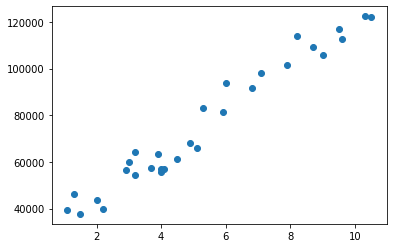

In [29]:
#YearExperience is the independent variable and Salary is the dependent variable.
x = df.drop("Salary",axis=1)
y = df.Salary
plt.scatter(x, y)  #Visualize the dataset by plotting the datapoints
plt.show()

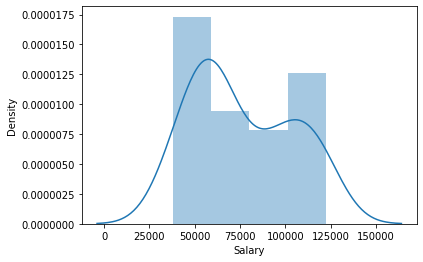

In [30]:
#We will use a distplot to visualize the distribution of ‘Salary’ column.
data = df['Salary']
sns.distplot(data)
plt.show()

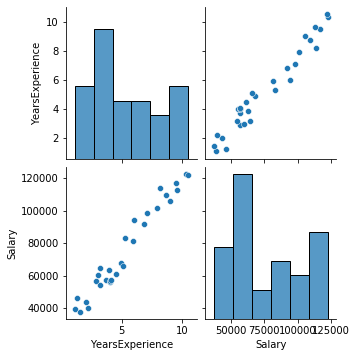

In [31]:
#We will use a pairplot to visualize the relationship
sns.pairplot(df)

### Linear Regression (using sklearn)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#split the dataset in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = lr.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

49830096.85590839

In [37]:
mean_absolute_error(y_test,y_pred)

6286.453830757749

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)                           

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 7059.04362190151
R2 Score= 0.9024461774180497


In [39]:
lr.predict([[4.7]])

array([69613.51503002])

In [40]:
print(lr.coef_)
print(lr.intercept_)

[9423.81532303]
25321.583011776813


#### So the equation will be:  y = 9423.82*X + 25321.58,   where y = Salary X = Years of Experience

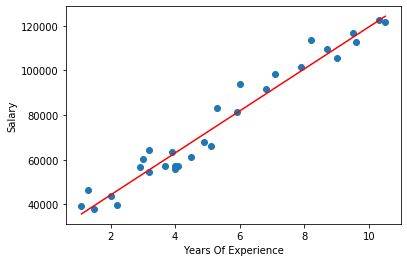

In [41]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x), color='red')
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()

### Linear Regression (Pseudo Inverse method)

A w = B where A = Outer Matrix Product of Feature Vector and its Transpose and B is the Outer Matrix Product of the Target Value and Feature Vector .<br>
We will calculate w using Pseudo inverse of A<br>
Here, w=$A^{-1}$b if A is invertible <br>
Else w=A+b where A+ is the Pseudo inverse.

In [42]:
#approach 1 to calculate weight vector and obtain predictions
x = df[['YearsExperience']]
y = df['Salary']
label=-34000

#Ax=b

A=np.outer(x,x)
b= np.array(y) * np.array(x)
pseudo=np.linalg.pinv(A)

W_vector = np.dot(pseudo,b)


coefficient = np.array(np.transpose(x))
coefficient=coefficient[0,0]-label
pred = np.array(x) * (coefficient)

array([[ 9449.96232146],
       [25792.20019867]])

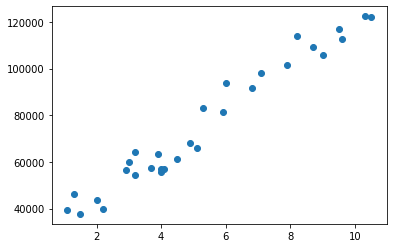

In [43]:
#approach 2
plt.scatter(df["YearsExperience"], df["Salary"])

#Ax=b

n=len(df["YearsExperience"])

A=np.zeros((n,2))
b=np.zeros((n,1))
x=np.zeros((2,1))

A[:,0]=df["YearsExperience"]
A[:,1]=1
b[:,0]=df["Salary"]


pseudo=np.linalg.pinv(A)  #pseudo=np.dot(np.linalg.inv(np.dot(np.transpose(A),A)), np.transpose(A))
x=np.dot(pseudo,b)
x

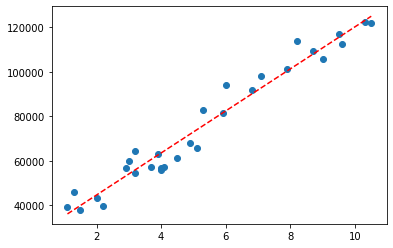

In [44]:
plt.scatter(df["YearsExperience"], df["Salary"])

y=x[0]*df["YearsExperience"]+x[1];

plt.plot(df["YearsExperience"],y,"--",c="red")
plt.show()

In [45]:
prediction=lambda b:x[0]*b+x[1]
price=prediction(5.4)
print(price)

[76821.99673453]


### Linear Regression (Gradient Descent)

•Initially learning rate=0.0001, intercept(c)=0 and slope(m)=0<br>
•Calculate partial derivative of loss function with respect to m and c.<br>
•Update current value of m and c<br>
•Repeat the above steps till loss=0

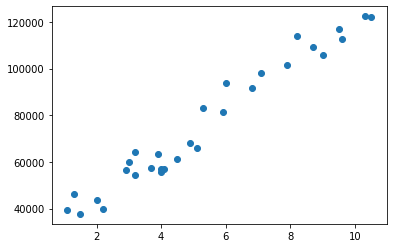

In [46]:
X = df.iloc[:, 0]
Y = df.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [47]:
#Gradient descent
epochs = 1000 
a = 0.0001  #learning Rate 

slope = 0  
intercept = 0  

n = float(len(X)) 

for i in range(epochs): 
    y_pred = slope*X + intercept  
    d1 = (-2/n)*sum(X * (Y - y_pred))  
    d2 = (-2/n)*sum(Y - y_pred) 
    slope = slope-a*d1  
    intercept = intercept-a*d2  
    
print(slope,intercept)

12836.600965885045 2915.2044856014018


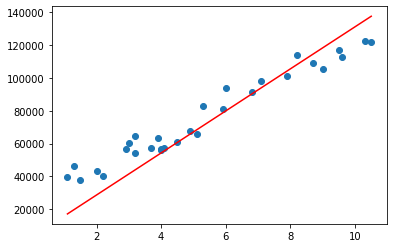

In [48]:
# Making predictions
y_pred = slope*X + intercept

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()